In [ ]:
!pip install tensorflow keras opencv-python-headless matplotlib scikit-learn

In [ ]:
from google.colab import files
files.upload()


Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sinhadhossainfahim","key":"ea2928cdeb741c32e28cc5d08a3128ba"}'}

In [ ]:
!pip install kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d bmadushanirodrigo/fracture-multi-region-x-ray-data
!unzip fracture-multi-region-x-ray-data.zip

Streaming output truncated to the last 5000 lines.
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3-rotated1.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2-rotated3.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated2.jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/not fractured/14-rotated2-rotated3 (1).jpg  
  inflating: Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train/

In [ ]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/train',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)

valid_generator = valid_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/val',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary'
)


Found 9246 images belonging to 2 classes.
Found 829 images belonging to 2 classes.


In [ ]:
base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)  # Add dropout for regularization
predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# Optionally freeze layers
for layer in base_model.layers:
    layer.trainable = False


29084464/29084464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [ ]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=20,
    validation_data=valid_generator,
    validation_steps=valid_generator.samples // valid_generator.batch_size
)


Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 474ms/step - accuracy: 0.6176 - loss: 0.6779

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


288/288 ━━━━━━━━━━━━━━━━━━━━ 183s 525ms/step - accuracy: 0.6179 - loss: 0.6776 - val_accuracy: 0.8600 - val_loss: 0.3907
Epoch 2/20
  1/288 ━━━━━━━━━━━━━━━━━━━━ 20s 72ms/step - accuracy: 0.7500 - loss: 0.4675

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


288/288 ━━━━━━━━━━━━━━━━━━━━ 10s 36ms/step - accuracy: 0.7500 - loss: 0.4675 - val_accuracy: 0.8966 - val_loss: 0.3420
Epoch 3/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 131s 447ms/step - accuracy: 0.7889 - loss: 0.4556 - val_accuracy: 0.8763 - val_loss: 0.3339
Epoch 4/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 435us/step - accuracy: 0.7500 - loss: 0.4404 - val_accuracy: 0.7931 - val_loss: 0.4243
Epoch 5/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 134s 456ms/step - accuracy: 0.8314 - loss: 0.3979 - val_accuracy: 0.8625 - val_loss: 0.3100
Epoch 6/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 4s 15ms/step - accuracy: 0.8125 - loss: 0.4040 - val_accuracy: 0.9655 - val_loss: 0.1673
Epoch 7/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 138s 461ms/step - accuracy: 0.8638 - loss: 0.3374 - val_accuracy: 0.9087 - val_loss: 0.2705
Epoch 8/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 0s 654us/step - accuracy: 0.8750 - loss: 0.3081 - val_accuracy: 0.8966 - val_loss: 0.3314
Epoch 9/20
288/288 ━━━━━━━━━━━━━━━━━━━━ 134s 453ms/step - accuracy: 0.8784 - loss: 0.3069 - val_

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    '/content/Bone_Fracture_Binary_Classification/Bone_Fracture_Binary_Classification/test',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    shuffle=False  # Important for correct label ordering in evaluation
)


Found 506 images belonging to 2 classes.


In [ ]:
test_loss, test_accuracy = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


16/16 ━━━━━━━━━━━━━━━━━━━━ 15s 936ms/step - accuracy: 0.9008 - loss: 0.2460
Test Loss: 0.23164615035057068
Test Accuracy: 0.9110671877861023


16/16 ━━━━━━━━━━━━━━━━━━━━ 21s 786ms/step


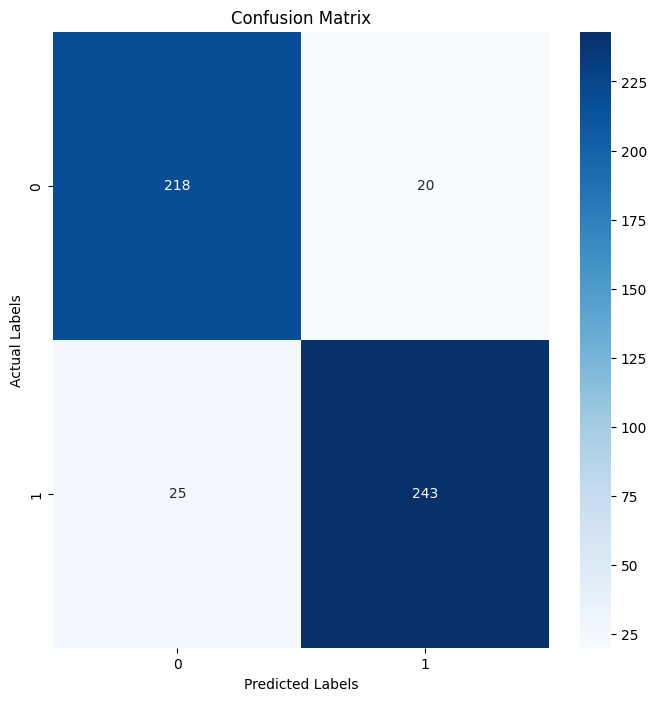

               precision    recall  f1-score   support

Not Fractured       0.90      0.92      0.91       238
    Fractured       0.92      0.91      0.92       268

     accuracy                           0.91       506
    macro avg       0.91      0.91      0.91       506
 weighted avg       0.91      0.91      0.91       506



In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

predictions = (model.predict(test_generator) > 0.5).astype(int)
true_labels = test_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Report
print(classification_report(true_labels, predictions, target_names=['Not Fractured', 'Fractured']))


 8/26 ━━━━━━━━━━━━━━━━━━━━ 4s 258ms/step - accuracy: 0.9388 - loss: 0.2072

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


26/26 ━━━━━━━━━━━━━━━━━━━━ 6s 210ms/step - accuracy: 0.9276 - loss: 0.2044
Validation Loss: 0.19330021739006042
Validation Accuracy: 0.9312424659729004
26/26 ━━━━━━━━━━━━━━━━━━━━ 10s 391ms/step


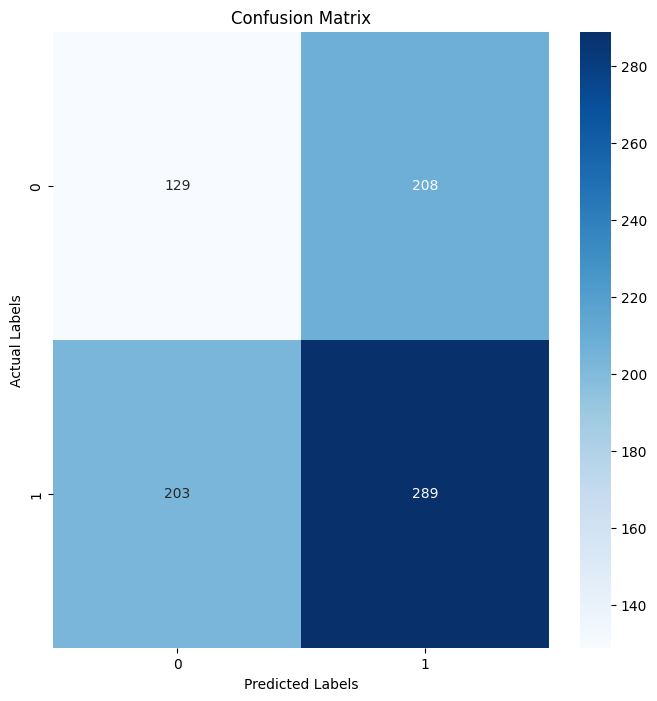

               precision    recall  f1-score   support

Not Fractured       0.39      0.38      0.39       337
    Fractured       0.58      0.59      0.58       492

     accuracy                           0.50       829
    macro avg       0.49      0.49      0.49       829
 weighted avg       0.50      0.50      0.50       829



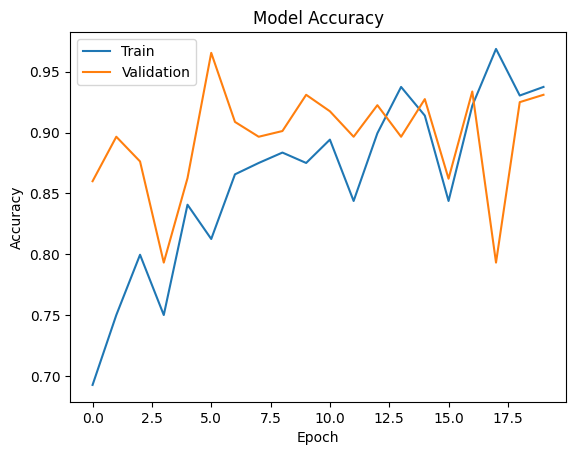

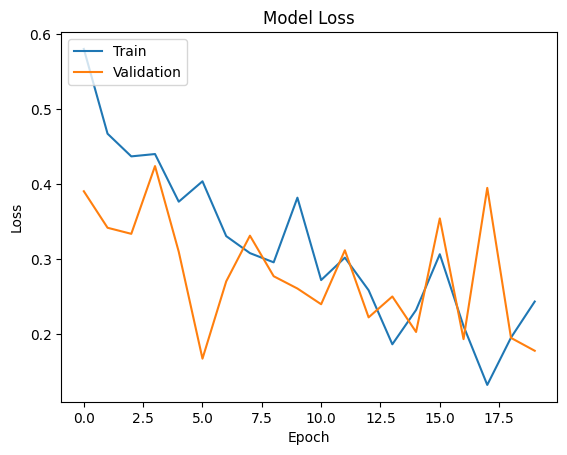

In [ ]:
# Evaluate the model
val_loss, val_accuracy = model.evaluate(valid_generator)
print(f"Validation Loss: {val_loss}")
print(f"Validation Accuracy: {val_accuracy}")

# Predictions for confusion matrix and classification report
predictions = (model.predict(valid_generator) > 0.5).astype(int)
true_labels = valid_generator.classes

# Confusion Matrix
cm = confusion_matrix(true_labels, predictions)
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
plt.title('Confusion Matrix')
plt.ylabel('Actual Labels')
plt.xlabel('Predicted Labels')
plt.show()

# Classification Report
print(classification_report(true_labels, predictions, target_names=['Not Fractured', 'Fractured']))

# Plot training & validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot training & validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


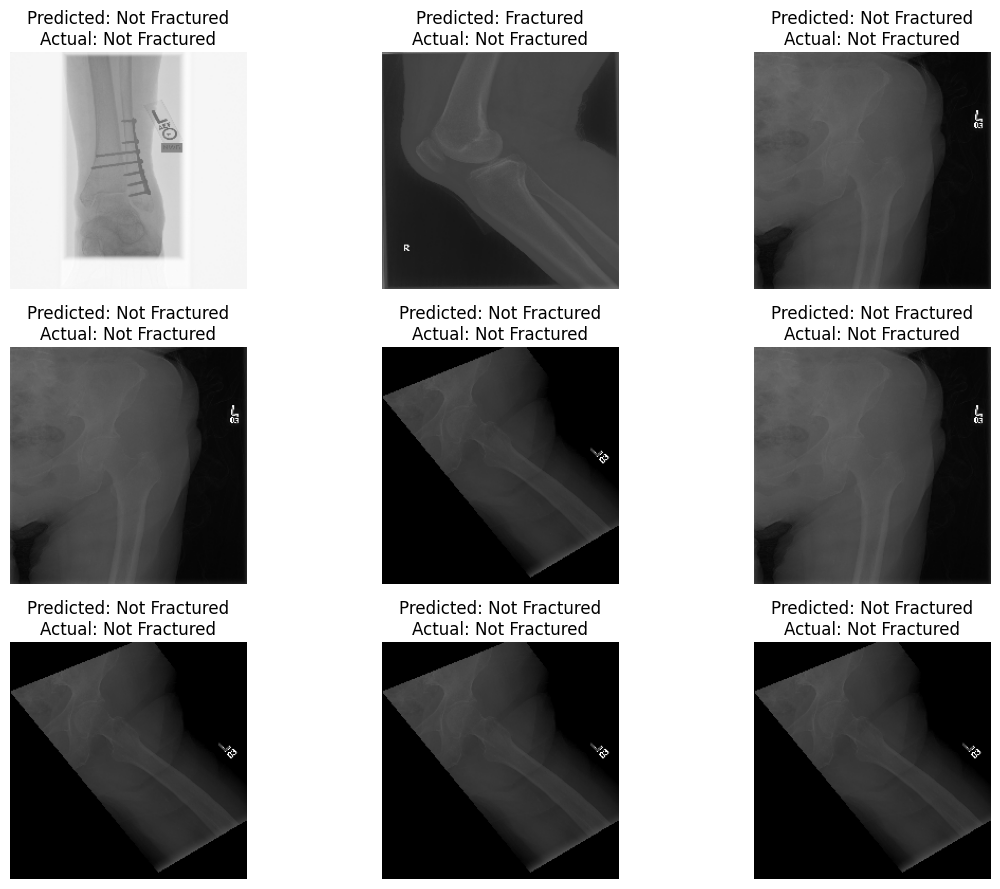

In [ ]:
import matplotlib.pyplot as plt

# Assuming test_generator is reset or freshly created for consistent indexing
test_generator.reset()
x_batch, y_batch = next(test_generator)

plt.figure(figsize=(12, 9))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    img = x_batch[i]
    pred = model.predict(np.expand_dims(img, axis=0))
    plt.imshow(img)
    plt.title(f'Predicted: {"Fractured" if pred > 0.5 else "Not Fractured"}\nActual: {"Fractured" if y_batch[i] > 0.5 else "Not Fractured"}')
    plt.axis('off')
plt.tight_layout()
plt.show()
